## **THE SPARKS FOUNDATION** 
### TASK 7 - Stock Market Prediction using Numerical and Textual Analysis (Level - Advanced))
* Objective: Create a hybrid model for stock price/performanceprediction using numerical analysis of historical stock prices, and sentimental analysis of news headlines
* Stock to analyze and predict - SENSEX (S&P BSE SENSEX)
* Download historical stock prices from finance.yahoo.com
* Download textual (news) data from https://bit.ly/36fFPI6
* Use either R or Python, or both for separate analysis and then combine the findings to create a hybrid model
* You are free to select a different stock to analyze and news dataset as well while not changing the objective of the task.




#### **Author: Urmi Sen**
Data Science & Business Analytics Intern \
Website: https://urmisen.github.io/website/ \
Linkedin: https://www.linkedin.com/in/urmi-sen-78a821149/ \
Email: urmisen1202@gmail.com

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/india-headlines-news-dataset/india-news-headlines.csv


In [2]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import datasets
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier              
from sklearn.metrics import roc_curve, auc
import pandas_datareader as pdr

### **Numerical Stock Data**

In [3]:
# Reading the Data 
df_stock_price=pdr.DataReader("^BSESN", data_source='yahoo', start= '1997-10-10', end= '2021-5-17')

In [4]:
df_stock_price.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1997-10-10,4083.989990,3999.649902,3999.649902,4057.370117,0.0,4057.370117
1997-10-13,4118.919922,4056.479980,4093.919922,4066.050049,0.0,4066.050049
1997-10-14,4062.810059,4011.110107,4061.510010,4012.399902,0.0,4012.399902
1997-10-15,4042.689941,3999.139893,4015.550049,4034.550049,0.0,4034.550049
1997-10-16,4090.510010,4046.469971,4082.659912,4077.050049,0.0,4077.050049


In [5]:
df_stock_price.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-05-11,49304.468750,48988.179688,49066.449219,49161.808594,15000.0,49161.808594
2021-05-12,49171.281250,48550.718750,49171.281250,48690.800781,17400.0,48690.800781
2021-05-14,48898.929688,48473.429688,48898.929688,48732.550781,18200.0,48732.550781
2021-05-17,49628.421875,48923.128906,48990.699219,49580.730469,20600.0,49580.730469
2021-05-18,50313.250000,49959.199219,49986.679688,50193.328125,14400.0,50193.328125


In [6]:
df_stock_price.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [7]:
df_stock_price.shape

(5804, 6)

### **Checking Data's Information ; Type**

In [8]:
df_stock_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5804 entries, 1997-10-10 to 2021-05-18
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       5804 non-null   float64
 1   Low        5804 non-null   float64
 2   Open       5804 non-null   float64
 3   Close      5804 non-null   float64
 4   Volume     5804 non-null   float64
 5   Adj Close  5804 non-null   float64
dtypes: float64(6)
memory usage: 317.4 KB


The dataset contains 5803 rows of records and 7 columns of attributes and a target column. The data types of the attributes are 6 quantitative continuous numerical float type and 1 categorical object type.

The memory space usage is at least 317.5+ Kilobytes (KB).

In [9]:
df_stock_price.describe()

,High,Low,Open,Close,Volume,Adj Close
count,5804.000000,5804.000000,5804.000000,5804.000000,5.804000e+03,5804.000000
mean,17205.798388,16960.366753,17100.635536,17080.570528,6.829064e+04,17080.570528
std,12273.932510,12144.387046,12225.295228,12207.952331,9.828214e+05,12207.952331
min,2682.590088,2594.870117,2621.889893,2600.120117,0.000000e+00,2600.120117
25%,4971.507446,4866.452515,4929.982544,4927.364868,5.775000e+03,4927.364868
50%,16525.334961,16223.365234,16378.069824,16398.165039,1.220000e+04,16398.165039
75%,26560.945801,26266.150391,26445.185059,26395.975586,1.920000e+04,26395.975586
max,52516.761719,51886.460938,52400.031250,52154.128906,3.181510e+07,52154.128906


### **Checking the null values :**

In [10]:
# Checking the training data dose it has any null value or not
df_stock_price.isnull().any().describe()

count         6
unique        1
top       False
freq          6
dtype: object

As here unique == 1 , thus the dataset is unique and here is no null value in the Dataset so, we can now visualize our Data.

In [11]:
df_stock_price.isnull().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

<AxesSubplot:ylabel='Date'>

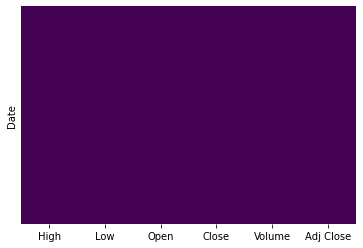

In [12]:
sns.heatmap(df_stock_price.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### **Checking For Duplicate data**

In [13]:
df_stock_price.duplicated().sum()

3

In [14]:
#dropping the duplicate data
df_stock_price.drop_duplicates()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1997-10-10,4083.989990,3999.649902,3999.649902,4057.370117,0.0,4057.370117
1997-10-13,4118.919922,4056.479980,4093.919922,4066.050049,0.0,4066.050049
1997-10-14,4062.810059,4011.110107,4061.510010,4012.399902,0.0,4012.399902
1997-10-15,4042.689941,3999.139893,4015.550049,4034.550049,0.0,4034.550049
1997-10-16,4090.510010,4046.469971,4082.659912,4077.050049,0.0,4077.050049
...,...,...,...,...,...,...
2021-05-11,49304.468750,48988.179688,49066.449219,49161.808594,15000.0,49161.808594
2021-05-12,49171.281250,48550.718750,49171.281250,48690.800781,17400.0,48690.800781
2021-05-14,48898.929688,48473.429688,48898.929688,48732.550781,18200.0,48732.550781


In [15]:
df_stock_price.reset_index(inplace=True)

In [16]:
# coverting the datatype of column 'Date' from type object to type 'datetime'
df_stock_price['Date'] = pd.to_datetime(df_stock_price['Date']).dt.normalize()

In [17]:
# filtering the important columns required
df_stock_price = df_stock_price.filter(['Date', 'Close', 'Open', 'High', 'Low', 'Volume'])

In [18]:
# setting column 'Date' as the index column
df_stock_price.set_index('Date', inplace= True)

In [19]:
# sorting the data according to the index i.e 'Date'
df_stock_price = df_stock_price.sort_index(ascending=True, axis=0)
df_stock_price.head()

,Close,Open,High,Low,Volume
Date,,,,,
1997-10-10,4057.370117,3999.649902,4083.989990,3999.649902,0.0
1997-10-13,4066.050049,4093.919922,4118.919922,4056.479980,0.0
1997-10-14,4012.399902,4061.510010,4062.810059,4011.110107,0.0
1997-10-15,4034.550049,4015.550049,4042.689941,3999.139893,0.0
1997-10-16,4077.050049,4082.659912,4090.510010,4046.469971,0.0


In [20]:
# #We'll calculate movig average of stocks for 10,20 & 30 days
# mov_avg_day = [10, 20, 30]

# for ma in mov_avg_day:
#   column_name = f"mov_avg for {ma} days"
#   df_stock[column_name] = df_stock['Adj Close'].rolling(ma).mean()

    
# df_stock.hist(figsize=(12, 12))

In [21]:
#stock dataframe with added moving averages
df_stock_price.head()

,Close,Open,High,Low,Volume
Date,,,,,
1997-10-10,4057.370117,3999.649902,4083.989990,3999.649902,0.0
1997-10-13,4066.050049,4093.919922,4118.919922,4056.479980,0.0
1997-10-14,4012.399902,4061.510010,4062.810059,4011.110107,0.0
1997-10-15,4034.550049,4015.550049,4042.689941,3999.139893,0.0
1997-10-16,4077.050049,4082.659912,4090.510010,4046.469971,0.0


In [22]:
# #Plotting moving averages for 10,20,30 days with adj close

# plt.figure(figsize=(12, 8))
# df_stock[['Adj Close', 'mov_avg for 10 days', 'mov_avg for 20 days', 'mov_avg for 30 days']].plot()
# plt.title('Moving averages for 10,20,30 days with adj close')
# plt.grid()
# plt.show()

In [23]:
# # We'll use pct_change to find the percent change in stock for each day
# df_stock['Daily Return'] = df_stock['Adj Close'].pct_change()

In [24]:
# #stock dataframe with added Daily return in stock
# df_stock.head()

In [25]:
# #Plotting the daily return percentage of stock for each day

# plt.figure(figsize=(12, 8))
# df_stock['Daily Return'].plot(legend=True)
# plt.title('Daily return on stock for each day')
# plt.grid()
# plt.show()

### **Textual News Headlines Data**

In [26]:
#Reading data(source: https://bit.ly/36fFPI6)
df_stock_news = pd.read_csv('/kaggle/input/india-headlines-news-dataset/india-news-headlines.csv')

In [27]:
df_stock_news.head()

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic


In [28]:
df_stock_news.tail()

,publish_date,headline_category,headline_text
3424062,20201231,city.jodhpur,Covid-19: Despite dip in cases; Rajasthan amon...
3424063,20201231,city.udaipur,Covid-19: Despite dip in cases; Rajasthan amon...
3424064,20201231,city.ajmer,Covid-19: Despite dip in cases; Rajasthan amon...
3424065,20201231,removed,Govt extends deadline for use of FASTag till F...
3424066,20201231,entertainment.bengali.movies.news,Celebs plan to party safely and responsibly on...


In [29]:
df_stock_news.columns

Index(['publish_date', 'headline_category', 'headline_text'], dtype='object')

In [30]:
df_stock_news.shape

(3424067, 3)

### **Checking Data's Information ; Type**

In [31]:
df_stock_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424067 entries, 0 to 3424066
Data columns (total 3 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   publish_date       int64 
 1   headline_category  object
 2   headline_text      object
dtypes: int64(1), object(2)
memory usage: 78.4+ MB


The dataset contains 3424067  rows of records and 3 columns of attributes. The data types of the attributes are quantitative continuous numerical integer type and 2 categorical object type.

The memory space usage is at least 78.4+ Megabytes (MB).

In [32]:
df_stock_news.describe()

,publish_date
count,3.424067e+06
mean,2.012659e+07
std,4.981132e+04
min,2.001010e+07
25%,2.009113e+07
50%,2.013092e+07
75%,2.017013e+07
max,2.020123e+07


### **Checking the null values :**

In [33]:
# Checking the training data dose it has any null value or not
df_stock_news.isnull().any().describe()

count         3
unique        1
top       False
freq          3
dtype: object

In [34]:
df_stock_news.isnull().sum()

publish_date         0
headline_category    0
headline_text        0
dtype: int64

As here unique == 1 , thus the dataset is unique and here is no null value in the Dataset so, we can now visualize our Data.

<AxesSubplot:>

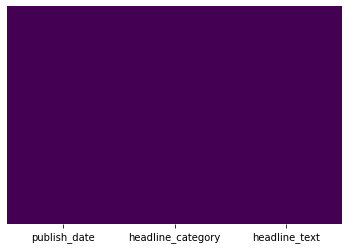

In [35]:
sns.heatmap(df_stock_news.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### **Checking For Duplicate data**

In [36]:
df_stock_news.duplicated().sum()

24191

In [37]:
#dropping the duplicate data
df_stock_news.drop_duplicates()

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic
...,...,...,...
3424062,20201231,city.jodhpur,Covid-19: Despite dip in cases; Rajasthan amon...
3424063,20201231,city.udaipur,Covid-19: Despite dip in cases; Rajasthan amon...
3424064,20201231,city.ajmer,Covid-19: Despite dip in cases; Rajasthan amon...
3424065,20201231,removed,Govt extends deadline for use of FASTag till F...


In [38]:
df_stock_news.reset_index(inplace=True)

In [39]:
# coverting the datatype of column 'Date' from type string to type 'datetime'
df_stock_news['publish_date'] = df_stock_news['publish_date'].astype(str)
df_stock_news['publish_date'] = df_stock_news['publish_date'].apply(lambda x: x[0:4]+'-'+x[4:6]+'-'+x[6:8])
df_stock_news['publish_date'] = pd.to_datetime(df_stock_news['publish_date']).dt.normalize()

In [40]:
# filtering the important columns required
df_stock_news = df_stock_news.filter(['publish_date', 'headline_text'])

In [41]:
# grouping the news headlines according to 'Date'
df_stock_news = df_stock_news.groupby(['publish_date'])['headline_text'].apply(lambda x: ','.join(x)).reset_index()

In [42]:
# setting column 'Date' as the index column
df_stock_news.set_index('publish_date', inplace= True)

In [43]:
# sorting the data according to the index i.e 'Date'
df_stock_news = df_stock_news.sort_index(ascending=True, axis=0)

In [44]:
df_stock_news.head()

,headline_text
publish_date,
2001-01-02,Status quo will not be disturbed at Ayodhya; s...
2001-01-03,"Powerless north India gropes in the dark,Think..."
2001-01-04,The string that pulled Stephen Hawking to Indi...
2001-01-05,Light combat craft takes India into club class...
2001-01-06,Light combat craft takes India into club class...


### **Combine Stock Price and Stock Headlines**

In [45]:
# concatenating the datasets stock_price and stock_headlines
df_stock_data = pd.concat([df_stock_price, df_stock_news], axis=1)

In [46]:
# dropping the null values if any
df_stock_data.dropna(axis=0, inplace=True)

In [47]:
df_stock_data.head()

,Close,Open,High,Low,Volume,headline_text
2001-01-02,4018.879883,3953.219971,4028.570068,3929.370117,0.0,Status quo will not be disturbed at Ayodhya; s...
2001-01-03,4060.020020,3977.580078,4067.659912,3977.580078,0.0,"Powerless north India gropes in the dark,Think..."
2001-01-04,4115.370117,4180.970215,4180.970215,4109.549805,0.0,The string that pulled Stephen Hawking to Indi...
2001-01-05,4183.729980,4116.339844,4195.009766,4115.350098,0.0,Light combat craft takes India into club class...
2001-01-08,4120.430176,4164.759766,4206.720215,4101.529785,0.0,"Sangh Parivar; Babri panel up the ante,Frontru..."


In [48]:
#alternate way is to use merge funtion and inner join operation 
pd.merge(df_stock_price, df_stock_news, left_index=True, right_index=True, how='inner')

,Close,Open,High,Low,Volume,headline_text
2001-01-02,4018.879883,3953.219971,4028.570068,3929.370117,0.0,Status quo will not be disturbed at Ayodhya; s...
2001-01-03,4060.020020,3977.580078,4067.659912,3977.580078,0.0,"Powerless north India gropes in the dark,Think..."
2001-01-04,4115.370117,4180.970215,4180.970215,4109.549805,0.0,The string that pulled Stephen Hawking to Indi...
2001-01-05,4183.729980,4116.339844,4195.009766,4115.350098,0.0,Light combat craft takes India into club class...
2001-01-08,4120.430176,4164.759766,4206.720215,4101.529785,0.0,"Sangh Parivar; Babri panel up the ante,Frontru..."
...,...,...,...,...,...,...
2020-12-24,46973.539062,46743.488281,47053.398438,46539.019531,13700.0,How to set the mood for sex during cold winter...
2020-12-28,47353.750000,47153.589844,47406.718750,47148.238281,9600.0,Horoscope Today; 28 December 2020: Check astro...
2020-12-29,47613.078125,47466.621094,47714.550781,47361.898438,12800.0,Man recovers charred remains of 'thief' from h...
2020-12-30,47746.218750,47789.031250,47807.851562,47358.359375,15600.0,Numerology Readings 30 December 2020: Predicti...


### **Sentiment Analysis**

In [49]:
import nltk
import re
from tqdm import tqdm
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('vader_lexicon')
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem.porter import PorterStemmer as ps

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


/opt/conda/lib/python3.7/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [50]:
# #Cleaning headlines

# c = []
# for i in tqdm(range(len(news_3yrs['News']))):
#     temp = re.sub('[^a-zA-Z]',' ', news_3yrs['News'][i])
#     temp = temp.lower()
#     temp = temp.split()
#     temp = [word for word in temp if not word in set(stopwords.words('english'))]
#     temp=' '.join(temp)
#     c.append(temp)

In [51]:
# news_3yrs['News'] = c
# news_3yrs

In [52]:
# #Merging stock and news_3yrs dataframe on Date column
# data = pd.merge(df_stock, news_3yrs, how ='inner', on ='Date')

# #Dropping na values if any
# data.dropna()

# data

In [53]:
# #Storing merged dataframe to csv file for later use
# data.to_csv('stock_news_final_data.csv')

In [54]:
#Functions to get the subjectivity and polarity

def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return  TextBlob(text).sentiment.polarity

In [55]:
#Adding subjectivity and polarity columns
df_stock_data['Subjectivity'] = df_stock_data['headline_text'].apply(getSubjectivity)
df_stock_data['Polarity'] = df_stock_data['headline_text'].apply(getPolarity)

In [56]:
#Adding sentiment score to data

sia = SentimentIntensityAnalyzer()

df_stock_data['Compound'] = [sia.polarity_scores(v)['compound'] for v in df_stock_data['headline_text']]
df_stock_data['Negative'] = [sia.polarity_scores(v)['neg'] for v in df_stock_data['headline_text']]
df_stock_data['Neutral'] = [sia.polarity_scores(v)['neu'] for v in df_stock_data['headline_text']]
df_stock_data['Positive'] = [sia.polarity_scores(v)['pos'] for v in df_stock_data['headline_text']]

In [57]:
#data with added sentiment scores
df_stock_data.head()

,Close,Open,High,Low,Volume,headline_text,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
2001-01-02,4018.879883,3953.219971,4028.570068,3929.370117,0.0,Status quo will not be disturbed at Ayodhya; s...,0.254902,0.113725,-0.9426,0.108,0.820,0.072
2001-01-03,4060.020020,3977.580078,4067.659912,3977.580078,0.0,"Powerless north India gropes in the dark,Think...",0.458333,0.108333,0.6322,0.084,0.817,0.098
2001-01-04,4115.370117,4180.970215,4180.970215,4109.549805,0.0,The string that pulled Stephen Hawking to Indi...,0.473506,0.132492,-0.5468,0.083,0.844,0.073
2001-01-05,4183.729980,4116.339844,4195.009766,4115.350098,0.0,Light combat craft takes India into club class...,0.458870,0.252557,0.9854,0.103,0.744,0.153
2001-01-08,4120.430176,4164.759766,4206.720215,4101.529785,0.0,"Sangh Parivar; Babri panel up the ante,Frontru...",0.308747,-0.017149,-0.9898,0.123,0.858,0.018


In [58]:
df_stock_data.columns

Index(['Close', 'Open', 'High', 'Low', 'Volume', 'headline_text',
       'Subjectivity', 'Polarity', 'Compound', 'Negative', 'Neutral',
       'Positive'],
      dtype='object')

In [59]:
# dropping the 'headline_text' which is unwanted now
df_stock_data.drop(['headline_text'], inplace=True, axis=1)

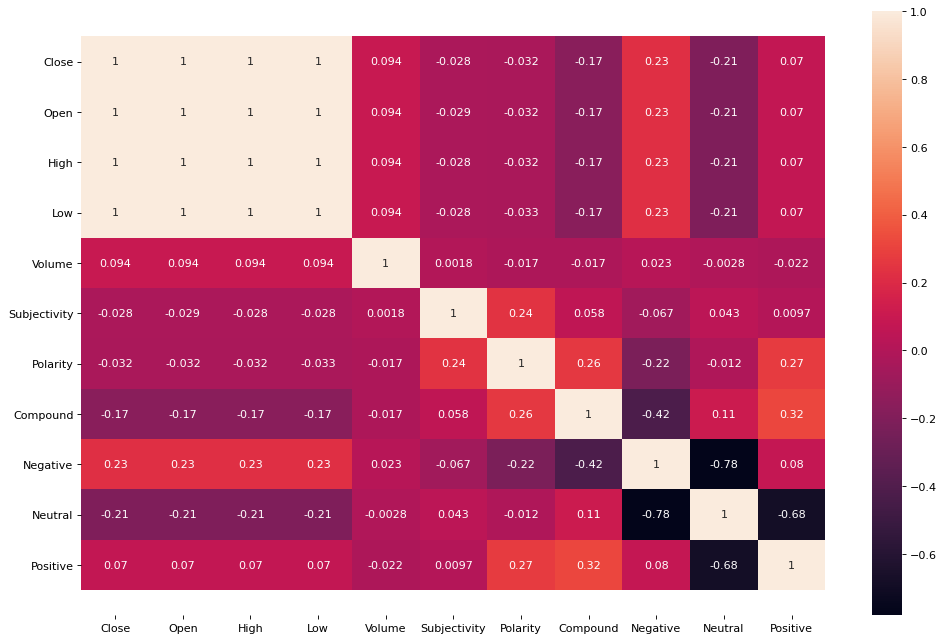

In [60]:

from matplotlib.pyplot import figure

figure(figsize=(15, 10), dpi=80)
ax=sns.heatmap(df_stock_data.corr(),annot=True)
bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)
plt.show()

In [61]:
#Picking only required columns
#Picking only required columns

df_stock_data = df_stock_data[['Close', 'Compound', 'Negative', 'Neutral', 'Positive', 'Open', 'High', 'Low', 'Volume']]


In [62]:
# set the index name
df_stock_data.index.name = 'Date'

# displaying the final stock_data
df_stock_data.head()

,Close,Compound,Negative,Neutral,Positive,Open,High,Low,Volume
Date,,,,,,,,,
2001-01-02,4018.879883,-0.9426,0.108,0.820,0.072,3953.219971,4028.570068,3929.370117,0.0
2001-01-03,4060.020020,0.6322,0.084,0.817,0.098,3977.580078,4067.659912,3977.580078,0.0
2001-01-04,4115.370117,-0.5468,0.083,0.844,0.073,4180.970215,4180.970215,4109.549805,0.0
2001-01-05,4183.729980,0.9854,0.103,0.744,0.153,4116.339844,4195.009766,4115.350098,0.0
2001-01-08,4120.430176,-0.9898,0.123,0.858,0.018,4164.759766,4206.720215,4101.529785,0.0


In [63]:
# writing the prepared stock_data to disk
df_stock_data.to_csv('df_stock_data.csv')

### **Exploratory Data Analysis**

In [64]:
# displaying the shape i.e. number of rows and columns of stock_data
df_stock_data.shape

(4893, 9)

#### **Checking the null values :**

In [65]:
# Checking the training data dose it has any null value or not
df_stock_news.isnull().any().describe()

count         1
unique        1
top       False
freq          1
dtype: object

In [66]:
df_stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4893 entries, 2001-01-02 to 2020-12-31
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Close     4893 non-null   float64
 1   Compound  4893 non-null   float64
 2   Negative  4893 non-null   float64
 3   Neutral   4893 non-null   float64
 4   Positive  4893 non-null   float64
 5   Open      4893 non-null   float64
 6   High      4893 non-null   float64
 7   Low       4893 non-null   float64
 8   Volume    4893 non-null   float64
dtypes: float64(9)
memory usage: 382.3 KB


In [67]:
df_stock_data.describe()

,Close,Compound,Negative,Neutral,Positive,Open,High,Low,Volume
count,4893.000000,4893.000000,4893.000000,4893.000000,4893.000000,4893.000000,4893.000000,4893.000000,4.893000e+03
mean,18685.761055,-0.875199,0.125445,0.788993,0.085575,18706.141903,18818.841446,18557.102644,8.070914e+04
std,11233.725489,0.445788,0.024283,0.033220,0.020801,11250.819220,11290.044725,11181.713549,1.069967e+06
min,2600.120117,-1.000000,0.000000,0.000000,0.000000,2621.889893,2682.590088,2594.870117,0.000000e+00
25%,8929.440430,-0.999800,0.111000,0.768000,0.075000,8939.379883,9033.990234,8799.009766,9.400000e+03
50%,17618.349609,-0.999100,0.127000,0.786000,0.085000,17650.820312,17769.250000,17500.789062,1.400000e+04
75%,27288.169922,-0.994500,0.140000,0.807000,0.096000,27316.429688,27445.240234,27159.449219,2.080000e+04
max,47751.328125,1.000000,0.444000,1.000000,0.608000,47789.031250,47896.968750,47602.121094,3.181510e+07


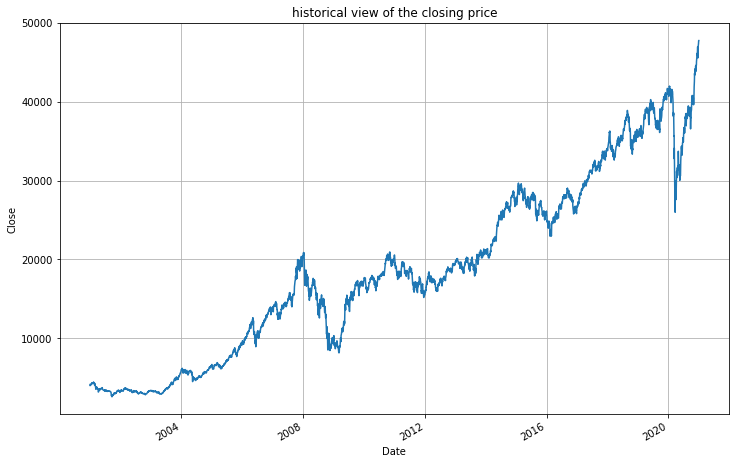

In [68]:
#Let's see a historical view of the closing price

plt.figure(figsize=(12, 8))
df_stock_data['Close'].plot()
plt.ylabel('Close')
plt.xlabel('Date')
plt.grid()
plt.title('historical view of the closing price')
plt.show()

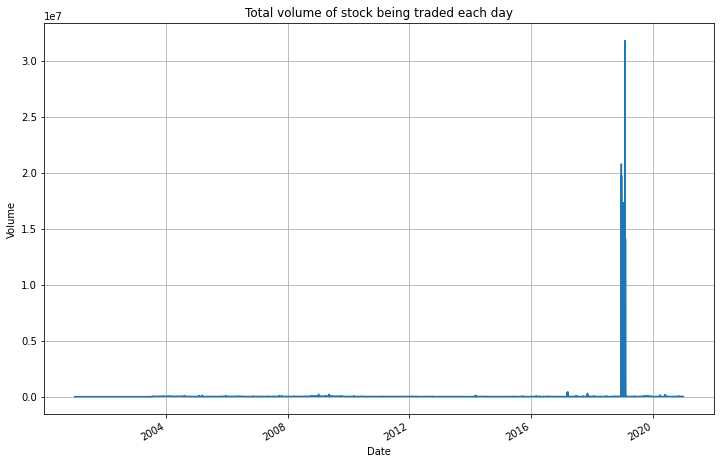

In [69]:
#Let's plot the total volume of stock being traded each day

plt.figure(figsize=(12, 8))
df_stock_data['Volume'].plot()
plt.grid()
plt.ylabel('Volume')
plt.title('Total volume of stock being traded each day')
plt.show()

In [70]:
# calculating 7 day rolling mean
df_stock_data.rolling(7).mean().head(20)

,Close,Compound,Negative,Neutral,Positive,Open,High,Low,Volume
Date,,,,,,,,,
2001-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-10,4095.911447,-0.346229,0.121143,0.813143,0.065429,4094.170027,4143.089983,4052.832799,0.0
2001-01-23,4135.598598,-0.078786,0.110429,0.822429,0.066857,4140.542899,4184.972831,4101.904227,0.0
2001-01-24,4173.655727,-0.298229,0.112143,0.829143,0.058571,4189.532854,4223.794294,4147.351353,0.0


<AxesSubplot:xlabel='Date'>

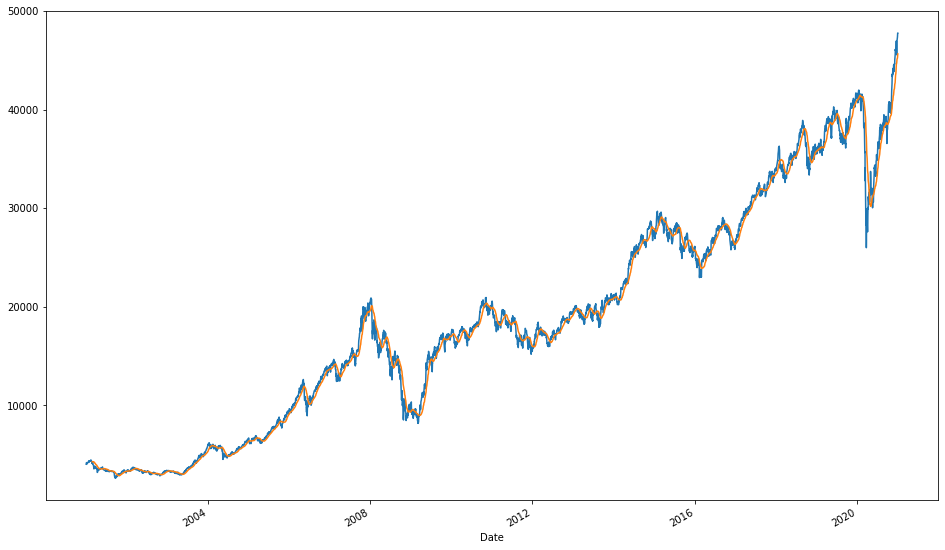

In [71]:
# setting figure size
plt.figure(figsize=(16,10))

# plotting the close price and a 30-day rolling mean of close price
df_stock_data['Close'].plot()
df_stock_data.rolling(window=30).mean()['Close'].plot()

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


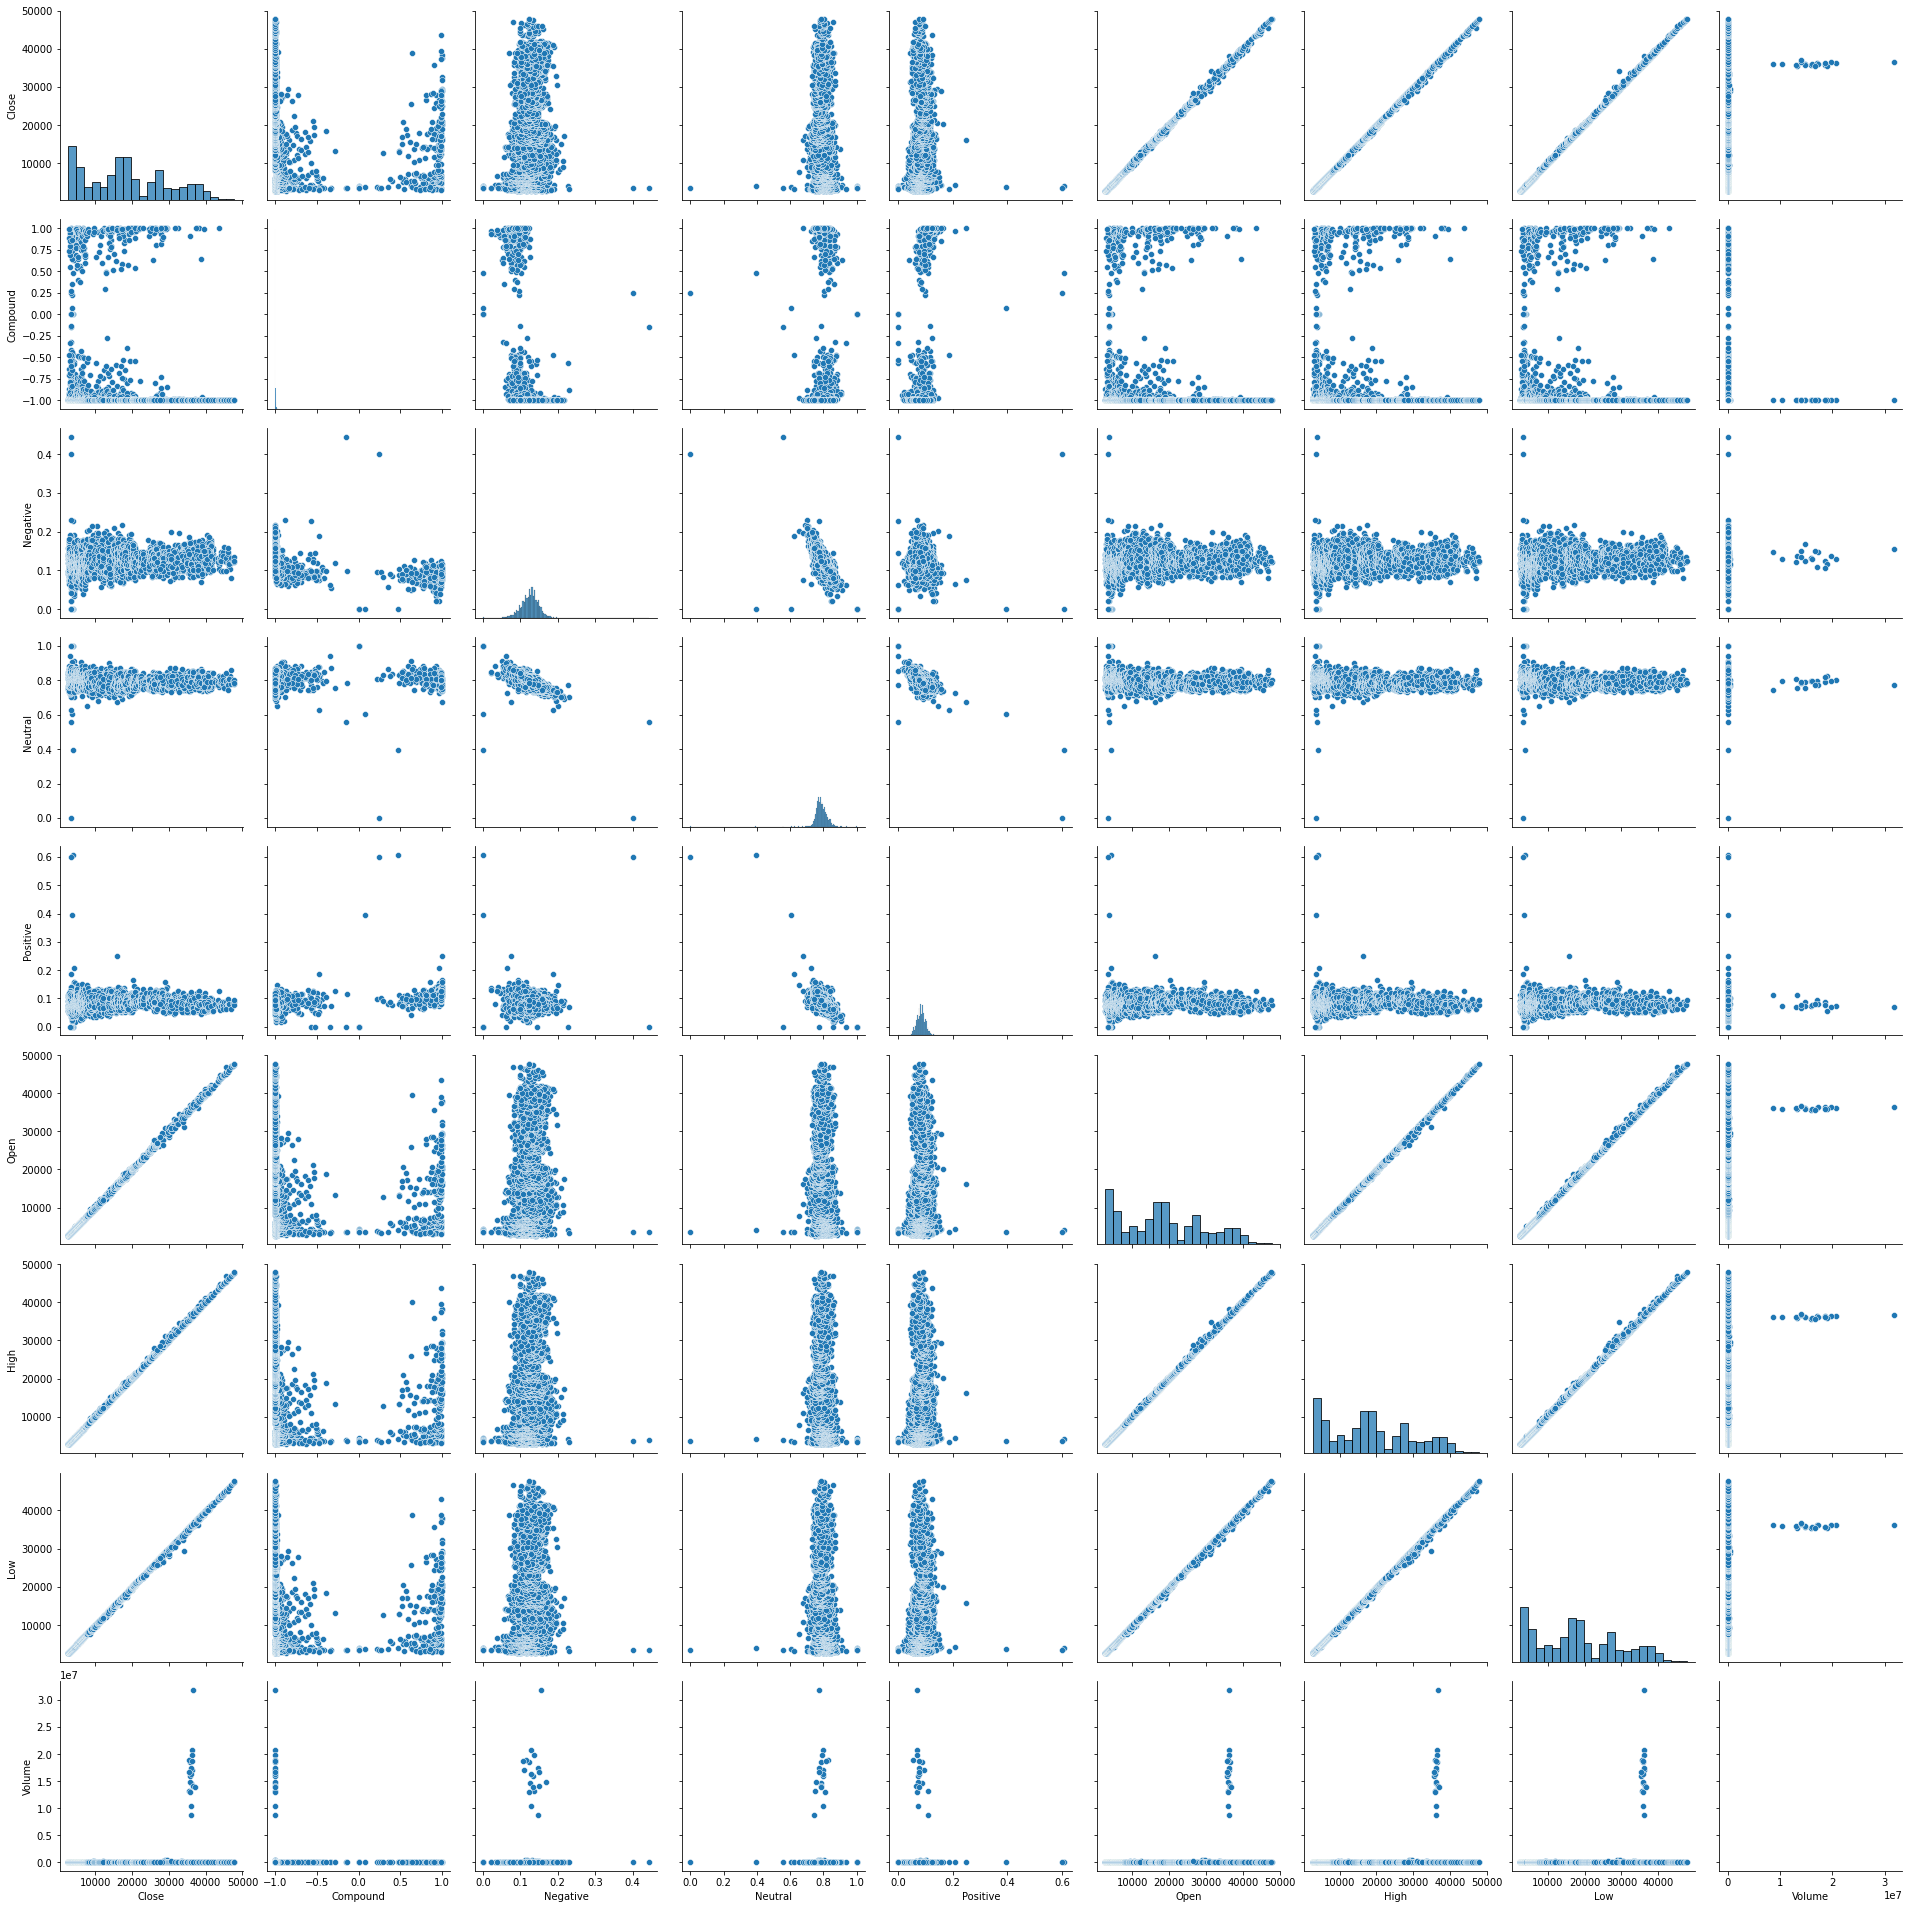

In [72]:
sns.pairplot(df_stock_data,size=3)

### **Data Preparation**

In [73]:
# calculating data_to_use
percentage_of_data = 1.0
data_to_use = int(percentage_of_data*(len(df_stock_data)-1))

# using 70% of data for training
train_end = int(data_to_use*0.7)
total_data = len(df_stock_data)
start = total_data - data_to_use
test_end = total_data - train_end
 
# printing number of records in the training and test datasets
print("Number of records in Training Data:", train_end)
print("Number of records in Test Data:", test_end) 

Number of records in Training Data: 3424
Number of records in Test Data: 1469


In [74]:

# predicting one step ahead
steps_to_predict = 1

# capturing data to be used for each column
close_price = df_stock_data.iloc[start:total_data,0] #close
compound = df_stock_data.iloc[start:total_data,1] #compound
negative = df_stock_data.iloc[start:total_data,2] #neg
neutral = df_stock_data.iloc[start:total_data,3] #neu
positive = df_stock_data.iloc[start:total_data,4] #pos
open_price = df_stock_data.iloc[start:total_data,5] #open
high = df_stock_data.iloc[start:total_data,6] #high
low = df_stock_data.iloc[start:total_data,7] #low
volume = df_stock_data.iloc[start:total_data,8] #volume

In [75]:
# printing close price
print("Close Price:")
close_price

Close Price:


Date
2001-01-03     4060.020020
2001-01-04     4115.370117
2001-01-05     4183.729980
2001-01-08     4120.430176
2001-01-09     4125.310059
                  ...     
2020-12-24    46973.539062
2020-12-28    47353.750000
2020-12-29    47613.078125
2020-12-30    47746.218750
2020-12-31    47751.328125
Name: Close, Length: 4892, dtype: float64

In [76]:
# shifting next day close
close_price_shifted = close_price.shift(-1) 

# shifting next day compound
compound_shifted = compound.shift(-1) 



In [77]:
# concatenating the captured training data into a dataframe
data = pd.concat([close_price, close_price_shifted, compound, compound_shifted, volume, open_price, high, low], axis=1)

# setting column names of the revised stock data
data.columns = ['close_price', 'close_price_shifted', 'compound', 'compound_shifted','volume', 'open_price', 'high', 'low']

In [78]:
# dropping nulls
data = data.dropna()    
data.head(10)

,close_price,close_price_shifted,compound,compound_shifted,volume,open_price,high,low
Date,,,,,,,,
2001-01-03,4060.020020,4115.370117,0.6322,-0.5468,0.0,3977.580078,4067.659912,3977.580078
2001-01-04,4115.370117,4183.729980,-0.5468,0.9854,0.0,4180.970215,4180.970215,4109.549805
2001-01-05,4183.729980,4120.430176,0.9854,-0.9898,0.0,4116.339844,4195.009766,4115.350098
2001-01-08,4120.430176,4125.310059,-0.9898,-0.9901,0.0,4164.759766,4206.720215,4101.529785
2001-01-09,4125.310059,4047.639893,-0.9901,-0.5719,0.0,4114.740234,4166.839844,4101.009766
2001-01-10,4047.639893,4296.689941,-0.5719,0.9295,0.0,4151.580078,4155.859863,4035.439941
2001-01-23,4296.689941,4326.419922,0.9295,-0.9039,0.0,4277.830078,4321.750000,4272.870117
2001-01-24,4326.419922,4330.220215,-0.9039,-0.9828,0.0,4320.509766,4339.410156,4295.709961
2001-01-25,4330.220215,4234.569824,-0.9828,0.9708,0.0,4327.839844,4341.330078,4273.700195


In [79]:
# setting the target variable as the shifted close_price
y = data['close_price_shifted']
y

Date
2001-01-03     4115.370117
2001-01-04     4183.729980
2001-01-05     4120.430176
2001-01-08     4125.310059
2001-01-09     4047.639893
                  ...     
2020-12-23    46973.539062
2020-12-24    47353.750000
2020-12-28    47613.078125
2020-12-29    47746.218750
2020-12-30    47751.328125
Name: close_price_shifted, Length: 4891, dtype: float64

In [80]:
# setting the features dataset for prediction  
cols = ['close_price', 'compound', 'compound_shifted', 'volume', 'open_price', 'high', 'low']
x = data[cols]
x

,close_price,compound,compound_shifted,volume,open_price,high,low
Date,,,,,,,
2001-01-03,4060.020020,0.6322,-0.5468,0.0,3977.580078,4067.659912,3977.580078
2001-01-04,4115.370117,-0.5468,0.9854,0.0,4180.970215,4180.970215,4109.549805
2001-01-05,4183.729980,0.9854,-0.9898,0.0,4116.339844,4195.009766,4115.350098
2001-01-08,4120.430176,-0.9898,-0.9901,0.0,4164.759766,4206.720215,4101.529785
2001-01-09,4125.310059,-0.9901,-0.5719,0.0,4114.740234,4166.839844,4101.009766
...,...,...,...,...,...,...,...
2020-12-23,46444.179688,-0.9995,-0.9965,10500.0,46072.300781,46513.320312,45899.101562
2020-12-24,46973.539062,-0.9965,-0.9997,13700.0,46743.488281,47053.398438,46539.019531
2020-12-28,47353.750000,-0.9997,-0.9997,9600.0,47153.589844,47406.718750,47148.238281


In [81]:
print(x)

             close_price  compound  compound_shifted   volume    open_price  \
Date                                                                          
2001-01-03   4060.020020    0.6322           -0.5468      0.0   3977.580078   
2001-01-04   4115.370117   -0.5468            0.9854      0.0   4180.970215   
2001-01-05   4183.729980    0.9854           -0.9898      0.0   4116.339844   
2001-01-08   4120.430176   -0.9898           -0.9901      0.0   4164.759766   
2001-01-09   4125.310059   -0.9901           -0.5719      0.0   4114.740234   
...                  ...       ...               ...      ...           ...   
2020-12-23  46444.179688   -0.9995           -0.9965  10500.0  46072.300781   
2020-12-24  46973.539062   -0.9965           -0.9997  13700.0  46743.488281   
2020-12-28  47353.750000   -0.9997           -0.9997   9600.0  47153.589844   
2020-12-29  47613.078125   -0.9997           -0.9997  12800.0  47466.621094   
2020-12-30  47746.218750   -0.9997           -0.9996

In [82]:
print(y)

Date
2001-01-03     4115.370117
2001-01-04     4183.729980
2001-01-05     4120.430176
2001-01-08     4125.310059
2001-01-09     4047.639893
                  ...     
2020-12-23    46973.539062
2020-12-24    47353.750000
2020-12-28    47613.078125
2020-12-29    47746.218750
2020-12-30    47751.328125
Name: close_price_shifted, Length: 4891, dtype: float64


### **Scaling the Target Variable and the Feature Dataset**

Since we are using LSTM to predict stock prices, which is a time series data, it is important to understand that LSTM can be very sensitive to the scale of the data. Right now, if the data is observed, it is present in different scales. Therefore, it is important to re-scale the data so that the range of the dataset is same, for almost all records. Here a feature range of (-1,1) is used.

In [83]:
from sklearn.preprocessing import MinMaxScaler

# scaling the feature dataset
scaler_x = preprocessing.MinMaxScaler (feature_range=(-1, 1))
x = np.array(x).reshape((len(x) ,len(cols)))
x = scaler_x.fit_transform(x)



In [84]:
# scaling the target variable
scaler_y = preprocessing.MinMaxScaler (feature_range=(-1, 1))
y = np.array (y).reshape ((len( y), 1))
y = scaler_y.fit_transform (y)


In [85]:
# displaying the scaled feature dataset 
print(x)

[[-0.93532553  0.6322     -0.5468     ... -0.93997007 -0.93861222
  -0.93822641]
 [-0.93287349 -0.5468      0.9854     ... -0.93096396 -0.93359019
  -0.93233057]
 [-0.92984511  0.9854     -0.9898     ... -0.93382579 -0.93296794
  -0.93207144]
 ...
 [ 0.98261339 -0.9997     -0.9997     ...  0.97186267  0.98222136
   0.99045457]
 [ 0.99410179 -0.9997     -0.9997     ...  0.98572369  0.99586481
   1.        ]
 [ 1.         -0.9997     -0.9996     ...  1.          1.
   0.99984189]]


In [86]:
# displaying the scaled target variable
print(y)

[[-0.93288109]
 [-0.92985305]
 [-0.93265695]
 ...
 [ 0.99387613]
 [ 0.99977368]
 [ 1.        ]]


### **Dividing the dataset into Training and Test**

In [87]:
# preparing training and test dataset
X_train = x[0 : train_end,]
X_test = x[train_end+1 : len(x),]    
y_train = y[0 : train_end] 
y_test = y[train_end+1 : len(y)]  

# printing the shape of the training and the test datasets
print('Number of rows and columns in the Training set X:', X_train.shape, 'and y:', y_train.shape)
print('Number of rows and columns in the Test set X:', X_test.shape, 'and y:', y_test.shape)

Number of rows and columns in the Training set X: (3424, 7) and y: (3424, 1)
Number of rows and columns in the Test set X: (1466, 7) and y: (1466, 1)


In [88]:
# reshaping the feature dataset for feeding into the model
X_train = X_train.reshape (X_train.shape + (1,)) 
X_test = X_test.reshape(X_test.shape + (1,))

# printing the re-shaped feature dataset
print('Shape of Training set X:', X_train.shape)
print('Shape of Test set X:', X_test.shape)

Shape of Training set X: (3424, 7, 1)
Shape of Test set X: (1466, 7, 1)


### **Modelling**

In [89]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Dense, Activation

In [90]:

# setting the seed to achieve consistent and less random predictions at each execution
np.random.seed(1234)

# setting the model architecture
model=Sequential()
model.add(LSTM(128,return_sequences=True,activation='tanh',input_shape=(len(cols),1)))
model.add(Dropout(0.1))
model.add(LSTM(128,return_sequences=True,activation='tanh'))
model.add(Dropout(0.1))
model.add(LSTM(128,activation='tanh'))
model.add(Dropout(0.1))
model.add(Dense(1))

# printing the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 7, 128)            66560     
_________________________________________________________________
dropout (Dropout)            (None, 7, 128)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 7, 128)            131584    
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 128)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 1

In [91]:
# compiling the model
model.compile(loss='mean_squared_error' , optimizer='adam')

# fitting the model using the training dataset
model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=64, verbose=1)

Epoch 1/50
43/43 [==============================] - 7s 37ms/step - loss: 0.1609 - val_loss: 0.1326
Epoch 2/50
43/43 [==============================] - 0s 8ms/step - loss: 0.0537 - val_loss: 0.1155
Epoch 3/50
43/43 [==============================] - 0s 8ms/step - loss: 0.0420 - val_loss: 0.0734
Epoch 4/50
43/43 [==============================] - 0s 8ms/step - loss: 0.0223 - val_loss: 0.0166
Epoch 5/50
43/43 [==============================] - 0s 8ms/step - loss: 0.0050 - val_loss: 0.0131
Epoch 6/50
43/43 [==============================] - 0s 8ms/step - loss: 0.0032 - val_loss: 0.0100
Epoch 7/50
43/43 [==============================] - 0s 8ms/step - loss: 0.0026 - val_loss: 0.0100
Epoch 8/50
43/43 [==============================] - 0s 8ms/step - loss: 0.0025 - val_loss: 0.0073
Epoch 9/50
43/43 [==============================] - 0s 8ms/step - loss: 0.0024 - val_loss: 0.0053
Epoch 10/50
43/43 [==============================] - 0s 8ms/step - loss: 0.0023 - val_loss: 0.0050
Epoch 11/50
43/43 

### **Saving the Model to disk**

In [92]:
# saving the model as a json file
model_json = model.to_json()
with open('model.json', 'w') as json_file:
    json_file.write(model_json)
    
# serialize weights to HDF5
model.save_weights('model.h5')
print('Model is saved to the disk')

Model is saved to the disk


### **Predictions**

In [93]:
# performing predictions
predictions = model.predict(X_test) 

# unscaling the predictions
predictions = scaler_y.inverse_transform(np.array(predictions).reshape((len(predictions), 1)))

# printing the predictions
print('Predictions:')
predictions[0:5]

Predictions:


array([[27725.744],
       [27572.799],
       [28136.744],
       [28261.805],
       [28460.59 ]], dtype=float32)

### **Model Evaluation**

In [94]:
# calculating the training mean-squared-error
train_loss = model.evaluate(X_train, y_train, batch_size = 1)

# calculating the test mean-squared-error
test_loss = model.evaluate(X_test, y_test, batch_size = 1)

# printing the training and the test mean-squared-errors
print('Train Loss =', round(train_loss,4))
print('Test Loss =', round(test_loss,4))

1466/1466 [==============================] - 4s 3ms/step - loss: 8.9742e-04
Train Loss = 0.0002
Test Loss = 0.0009


In [95]:
#mean_absolute_error is one of the ideal metric for regression task although there is no optimal value for it.
#But the balance between train and test error should be there in MAE to avoid
#underfitting(very high MSE for test/validation/unseen data) and overfitting(very low MSE for training data).

from sklearn.metrics import mean_absolute_error,mean_squared_error

print('Mean Absolute Error (MAE) for train data:',mean_absolute_error(model.predict(X_train), y_train))
print('Mean Squared Error (MAE) for train data:',mean_squared_error(model.predict(X_train), y_train))
print()
print('Mean Absolute Error (MAE) for test data:',mean_absolute_error(model.predict(X_test), y_test))
print('Mean Squared Error (MAE) for test data:',mean_squared_error(model.predict(X_test), y_test))

Mean Absolute Error (MAE) for train data: 0.012638444162781166
Mean Squared Error (MAE) for train data: 0.00023054707243935177

Mean Absolute Error (MAE) for test data: 0.020457170548687918
Mean Squared Error (MAE) for test data: 0.000897415587357284


In [96]:
print('Mean Absolute Error (MAE) for train data:',mean_absolute_error(model.predict(X_train), y_train))
print('Mean Squared Error (MAE) for train data:',mean_squared_error(model.predict(X_train), y_train))
print('Mean Absolute Error (MAE) for test data:',mean_absolute_error(model.predict(X_test), y_test))
print('Mean Squared Error (MAE) for test data:',mean_squared_error(model.predict(X_test), y_test))

Mean Absolute Error (MAE) for train data: 0.012638444162781166
Mean Squared Error (MAE) for train data: 0.00023054707243935177
Mean Absolute Error (MAE) for test data: 0.020457170548687918
Mean Squared Error (MAE) for test data: 0.000897415587357284


### **Plotting the Predictions against unseen data**

In [97]:
# unscaling the test feature dataset, x_test
X_test = scaler_x.inverse_transform(np.array(X_test).reshape((len(X_test), len(cols))))

# unscaling the test y dataset, y_test
y_train = scaler_y.inverse_transform(np.array(y_train).reshape((len(y_train), 1)))
y_test = scaler_y.inverse_transform(np.array(y_test).reshape((len(y_test), 1)))

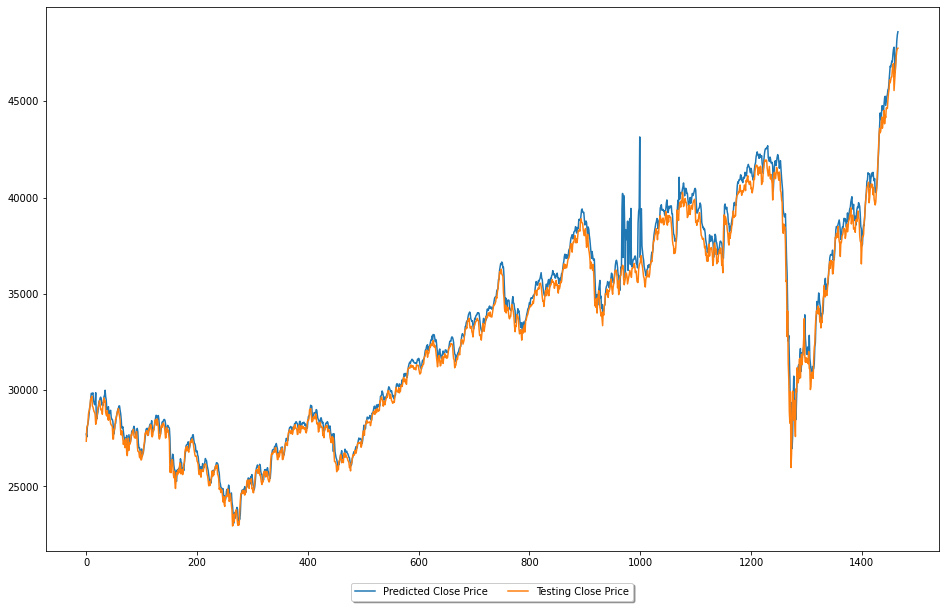

In [98]:
# plotting
plt.figure(figsize=(16,10))

# plt.plot([row[0] for row in y_train], label="Training Close Price")
plt.plot(predictions, label="Predicted Close Price")
plt.plot([row[0] for row in y_test], label="Testing Close Price")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=2)
plt.show()

# **THANK YOU ...!  :)**